<a href="https://colab.research.google.com/github/sheddyranking/Dog_Breeds_Classification/blob/main/Classifying_Dog_Breeds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**UNZIP THE FILES**

In [ ]:
#!unzip "/content/drive/MyDrive/ Classifying_Dogs_Breeds/dog-breed-identification.zip" -d "/content/drive/MyDrive/ Classifying_Dogs_Breeds/" 

# Using Transfer Learning and TensorFlow to Classify Different Dog Breeds 🐶

## Problem
Identifying the breed of a dog when given an image of a dog. for example when sitting at a stadium and i take a photo of a dog, i want to know what breed it is.

## Data
The data that we are using is from kaggle dogs breeds identification competition https://www.kaggle.com/competitions/dog-breed-identification/data

## Evaluation
The Evaluation is to submit a file with predictable probabilities for each Dog breed for each test image. https://www.kaggle.com/competitions/dog-breed-identification/overview/evaluation

## Features
some information about the data:
* we are dealing with images (unstructured data) so it is probably best we use Deep Learning/Transfer Learning.
* There 120 Breeds of Dogs(there are 120 different classes)
* There are around 10,000+ images in the training set (this images have labels)
* There are around 10,000+ images in the testing set (this images do not have labels because we will want to predict them).


# Get our workspace ready
* Import TensorFlow 
* Import TensorFlow Hub
* Make sure we are using a GPU

In [ ]:
## import the necessary libraries

import tensorflow as tf
import tensorflow_hub as hub

print("tf-version:",tf.__version__)
print("tfhub-version:",hub.__version__)

##check for GPU availability
print("GPU", "Available" if tf.config.list_physical_devices("GPU") else "not available") 

tf-version: 2.9.2
tfhub-version: 0.12.0
GPU Available


# Getting our data Ready(Turning it into Tensors)

In [33]:
## let's check out our labels

import pandas as pd 

labels = pd.read_csv("/content/drive/MyDrive/ Classifying_Dogs_Breeds/labels.csv")

In [ ]:
labels.describe()

,id,breed
count,10222,10222
unique,10222,120
top,000bec180eb18c7604dcecc8fe0dba07,scottish_deerhound
freq,1,126


In [ ]:
labels.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
## How many Dog Breeds are there

labels["breed"].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

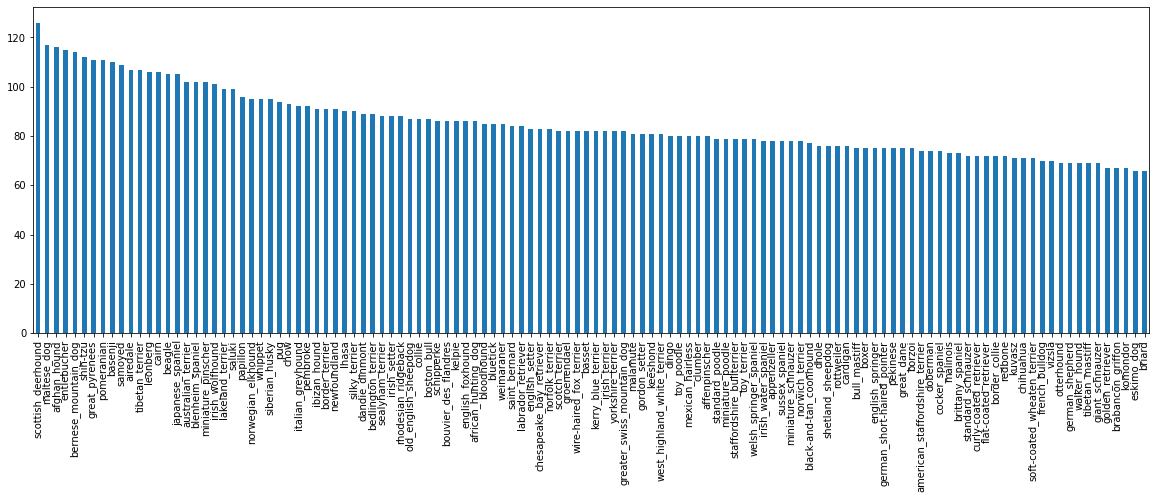

In [ ]:
#Lets visualize it 
labels["breed"].value_counts().plot.bar(figsize=(20,6))

In [ ]:
##what's the median of images of per class.
labels["breed"].value_counts().median()

82.0

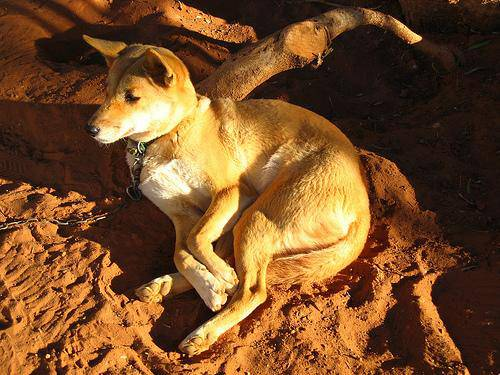

In [ ]:
## let's view an image

from IPython.display import Image
Image("/content/drive/MyDrive/ Classifying_Dogs_Breeds/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

# Getting Images and thier Labels

### Let's get a list of all our images pathNames

In [ ]:
#Create PathNames from Image ID's from train set

filenames = ["/content/drive/MyDrive/ Classifying_Dogs_Breeds/train/" + fname + ".jpg" for fname in labels["id"]]

filenames[:10]

['/content/drive/MyDrive/ Classifying_Dogs_Breeds/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/ Classifying_Dogs_Breeds/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/ Classifying_Dogs_Breeds/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/ Classifying_Dogs_Breeds/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/ Classifying_Dogs_Breeds/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/ Classifying_Dogs_Breeds/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/ Classifying_Dogs_Breeds/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/ Classifying_Dogs_Breeds/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/ Classifying_Dogs_Breeds/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '/content/drive/MyDrive/ Classifying_Dogs_Breeds/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
## check  if the actual trian data matches the created  filename

import os
if len(os.listdir("/content/drive/MyDrive/ Classifying_Dogs_Breeds/train/")) == len(filenames):
  print("File size matches")
else:
  print("file size does not match")

File size matches


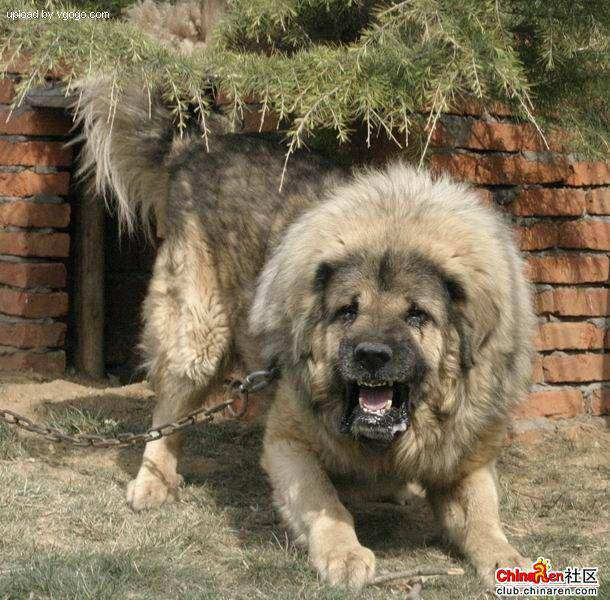

In [ ]:
#one more check
Image(filenames[9000])

In [ ]:
#check breed
labels["breed"][9000]

'tibetan_mastiff'

###  Preparing the labels (dependent variable or target[y]))

since we have now got the filePath for our trainning set in a list,lets prepare our labels


In [34]:
import numpy as np 
#get labels breed and covert to a numpy array
labels = labels["breed"].to_numpy() 

labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [28]:
len(labels)

10222

In [29]:
## check to see if label matches filename(train set) size to see if there's a need for engineering features/labels

if len(labels) == len(filenames):
  print("YES!!")
else:
  print("DOES NOT MATCH")

YES!!


In [36]:
## Get the unique breeds

unique_breeds = np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [37]:
## let's try turning one single breed to a boolean then we do it for the rest

print(labels[0])
#return true where labels[0] match unique_breeds
labels[0] == unique_breeds


boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [43]:
## Now let's turn every breed into boolean

boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [47]:
## Now let's take a look at our labels in numerical format

print(labels[0]) # Original label name
print(np.where(unique_breeds == labels[0])) #Index where the label occur
print(boolean_labels[0].argmax()) #index where label occur in the boolean array
print(boolean_labels[0].astype(int)) #there will be a 1 where the sample label occur in the boolean array

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [49]:
## let's check another breed label to see where it appears in the boolean array

print(labels[20])
print(boolean_labels[22].astype(int))

doberman
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
